In [41]:
import pandas as pd
import numpy as np
import seaborn as sns


In [42]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [43]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\KDH\AppData\Local\Temp\ipykernel_16308\2409215588.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<Axes: title={'center': '한글폰트'}>

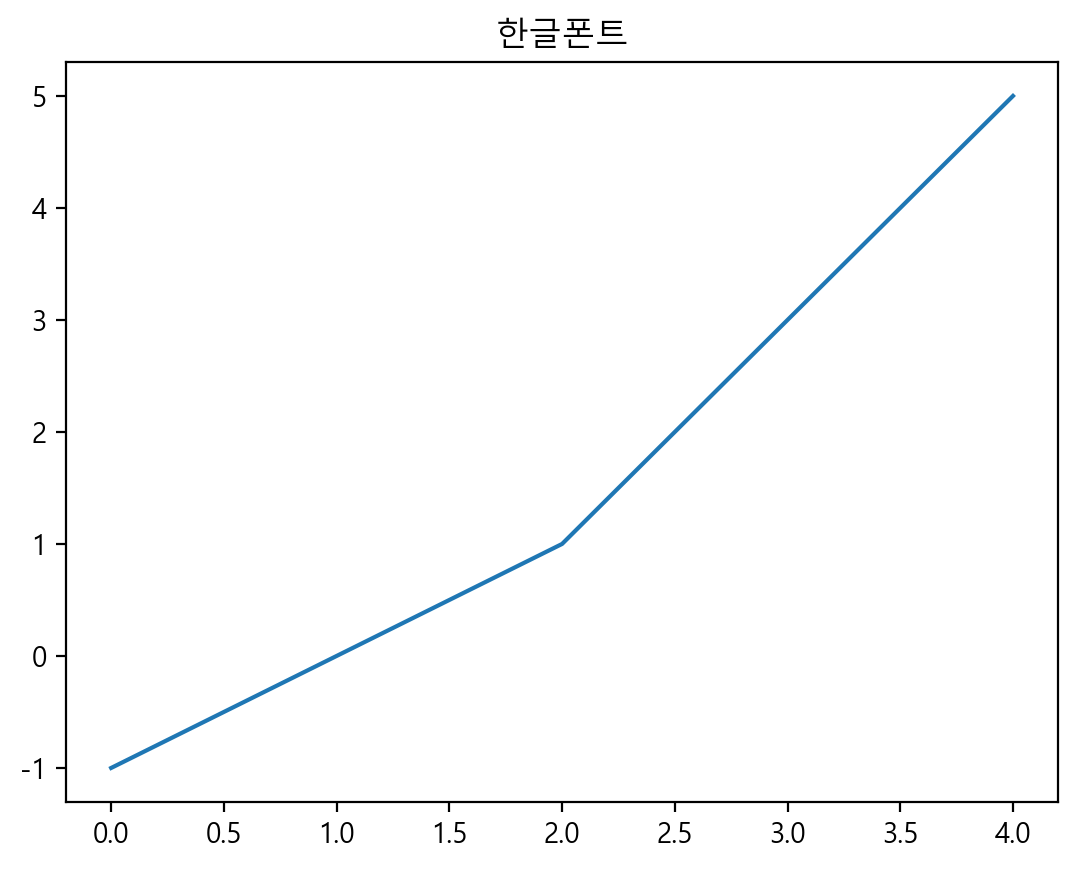

In [44]:
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

In [45]:
df = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202510.csv")
df.shape

(536262, 39)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536262 entries, 0 to 536261
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     536262 non-null  object 
 1   상호명        536262 non-null  object 
 2   지점명        47467 non-null   object 
 3   상권업종대분류코드  536262 non-null  object 
 4   상권업종대분류명   536262 non-null  object 
 5   상권업종중분류코드  536262 non-null  object 
 6   상권업종중분류명   536262 non-null  object 
 7   상권업종소분류코드  536262 non-null  object 
 8   상권업종소분류명   536262 non-null  object 
 9   표준산업분류코드   536061 non-null  object 
 10  표준산업분류명    536061 non-null  object 
 11  시도코드       536262 non-null  int64  
 12  시도명        536262 non-null  object 
 13  시군구코드      536262 non-null  int64  
 14  시군구명       536262 non-null  object 
 15  행정동코드      536262 non-null  int64  
 16  행정동명       536262 non-null  object 
 17  법정동코드      536262 non-null  int64  
 18  법정동명       536262 non-null  object 
 19  지번코드       536262 non-n

<Axes: >

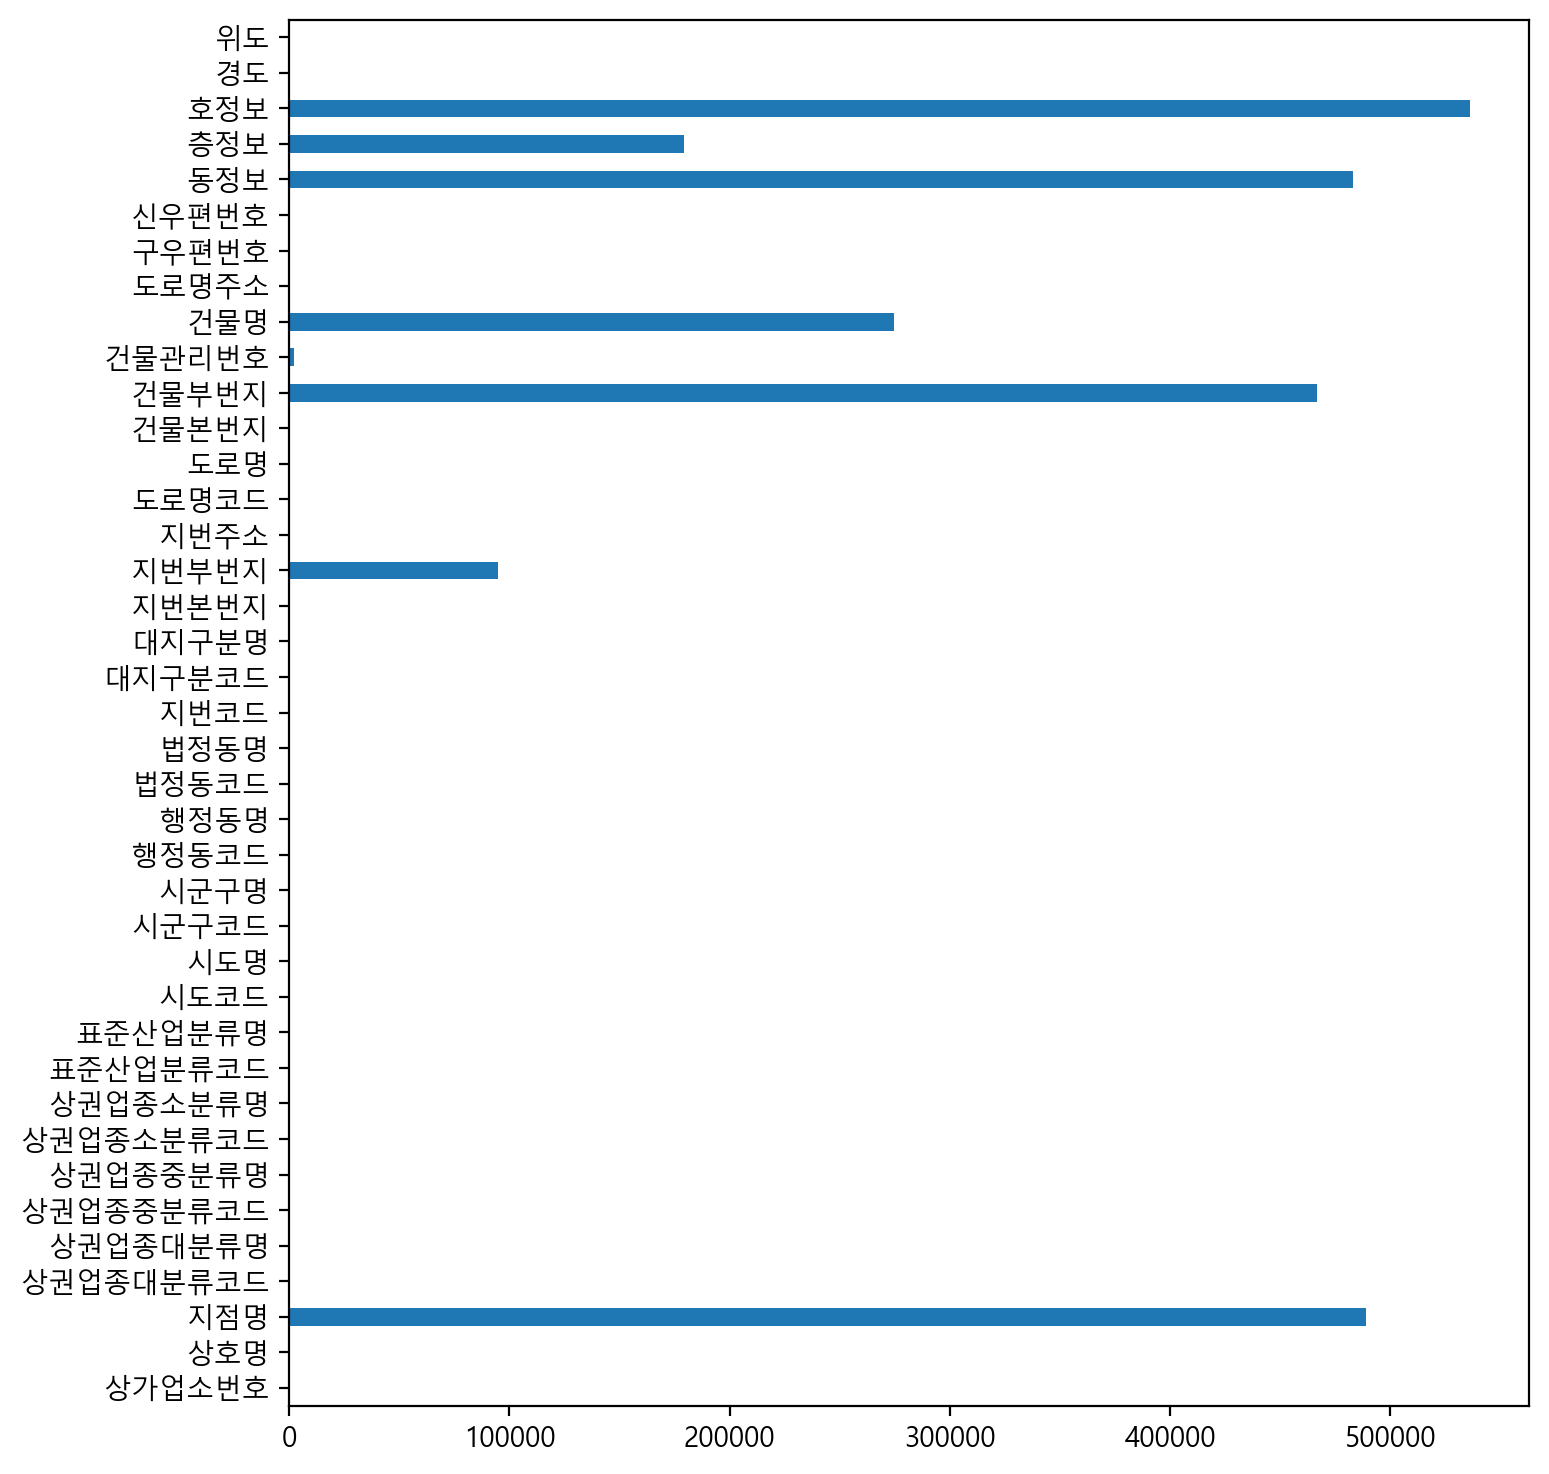

In [47]:
df.isnull().sum().plot.barh(figsize=(8, 9))

In [48]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

(536262, 11)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536262 entries, 0 to 536261
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       536262 non-null  object 
 1   상권업종대분류명  536262 non-null  object 
 2   상권업종중분류명  536262 non-null  object 
 3   상권업종소분류명  536262 non-null  object 
 4   시도명       536262 non-null  object 
 5   시군구명      536262 non-null  object 
 6   행정동명      536262 non-null  object 
 7   법정동명      536262 non-null  object 
 8   도로명주소     536262 non-null  object 
 9   경도        536262 non-null  float64
 10  위도        536262 non-null  float64
dtypes: float64(2), object(9)
memory usage: 45.0+ MB


In [50]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(536262, 11)

In [51]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,영어독서클럽영어교습소,교육,일반 교육,입시·교과학원,서울특별시,강서구,등촌3동,등촌동,서울특별시 강서구 공항대로41길 51,126.845780,37.560238,영어독서클럽영어교습소
1,하루달곰,음식,기타 간이,빵/도넛,서울특별시,노원구,상계2동,상계동,서울특별시 노원구 상계로1길 82-14,127.062003,37.659314,하루달곰
2,양산박,음식,한식,백반/한정식,서울특별시,서초구,양재2동,양재동,서울특별시 서초구 언남11길 34-1,127.043051,37.475637,양산박
3,으뜸공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,마포구,염리동,염리동,서울특별시 마포구 숭문길 182,126.946651,37.554524,으뜸공인중개사사무소
4,세선티알엠,시설관리·임대,조경·유지,조경 유지·관리 서비스업,서울특별시,관악구,삼성동,신림동,서울특별시 관악구 호암로 538,126.931669,37.465579,세선티알엠


In [52]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"]

1114       이디야영등포그랜드점
1196          이디아망원역점
2635              이디아
4242              이디야
6343         이디야커피중앙대
             ...     
534308     이디야서울삼성내과점
534403     이디야영등포knk점
535078    이디야국립국악원예악당
535751         이디야서울대
536194     이디야커피당고개역점
Name: 상호명_소문자, Length: 492, dtype: object

In [53]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("투썸플레이스|투섬플레이스|twosome"), "상호명_소문자"]

821       투썸플레이스송파올림픽아파트
5570         투썸플레이스강남세곡점
8309         투썸플레이스강서화곡로
10869      투썸플레이스중곡대원외고점
12969        투썸플레이스개화산역점
               ...      
529901    투썸플레이스역사문화공원역점
530063     투썸플레이스구로대륭1차점
530086          투썸플레이스상계
533488            투썸플레이스
534951     투썸플레이스고대참살이길점
Name: 상호명_소문자, Length: 362, dtype: object

In [54]:
df_cafe = df_seoul[
    df_seoul["상호명_소문자"].str.contains('투썸플레이스|투섬플레이스|twosome|이디야|이디아|ediya')].copy()
df_cafe.shape

(854, 12)

In [55]:
df_cafe.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
821,투썸플레이스송파올림픽아파트,음식,비알코올,카페,서울특별시,송파구,오금동,오금동,서울특별시 송파구 위례성대로 198,127.132829,37.509313,투썸플레이스송파올림픽아파트
1114,이디야영등포그랜드점,음식,비알코올,카페,서울특별시,영등포구,양평1동,양평동3가,서울특별시 영등포구 양산로9길 15,126.888601,37.526796,이디야영등포그랜드점
1196,이디아망원역점,음식,비알코올,카페,서울특별시,마포구,서교동,서교동,서울특별시 마포구 월드컵로 82-1,126.910230,37.556376,이디아망원역점
2635,이디아,음식,비알코올,카페,서울특별시,서대문구,신촌동,창천동,서울특별시 서대문구 신촌로 87-20,126.936464,37.556511,이디아
4242,이디야,음식,비알코올,카페,서울특별시,강북구,미아동,미아동,서울특별시 강북구 도봉로 207,127.025477,37.627064,이디야


In [56]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('투썸플레이스|투섬플레이스|twosome'), "브랜드명"] = "투썸플레이스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('투썸플레이스|투섬플레이스|twosome'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
821,투썸플레이스송파올림픽아파트,투썸플레이스
1114,이디야영등포그랜드점,이디야
1196,이디아망원역점,이디야
2635,이디아,이디야
4242,이디야,이디야


In [57]:
df_cafe[["상호명", "브랜드명"]].tail()

,상호명,브랜드명
534403,이디야영등포knk점,이디야
534951,투썸플레이스고대참살이길점,투썸플레이스
535078,이디야국립국악원예악당,이디야
535751,이디야서울대,이디야
536194,이디야커피당고개역점,이디야


<Axes: ylabel='상권업종중분류명'>

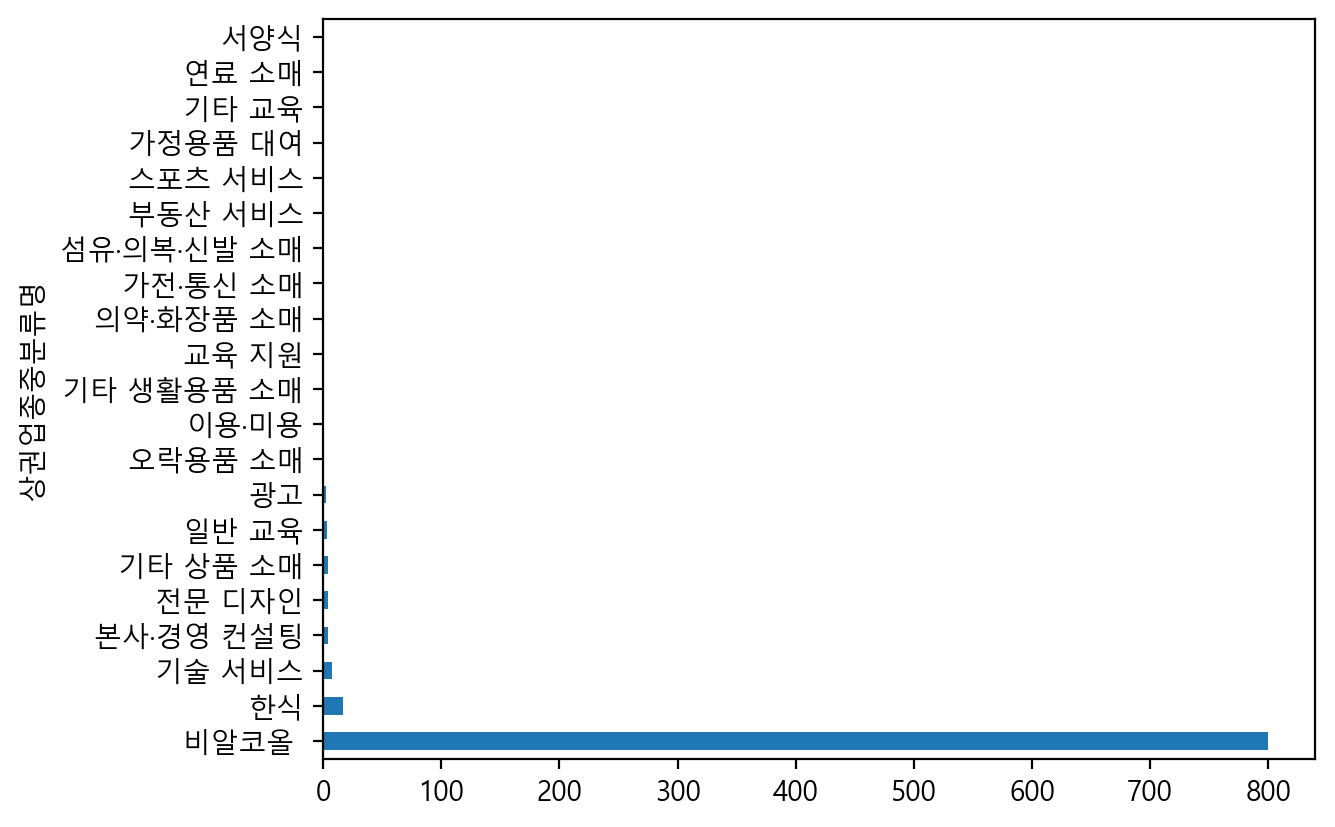

In [58]:
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [59]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "비알코올 "].copy()
df_cafe.shape

(854, 13)


(800, 13)

In [60]:
df_cafe["브랜드명"].value_counts()

브랜드명
이디야       455
투썸플레이스    345
Name: count, dtype: int64

<Axes: xlabel='브랜드명', ylabel='count'>

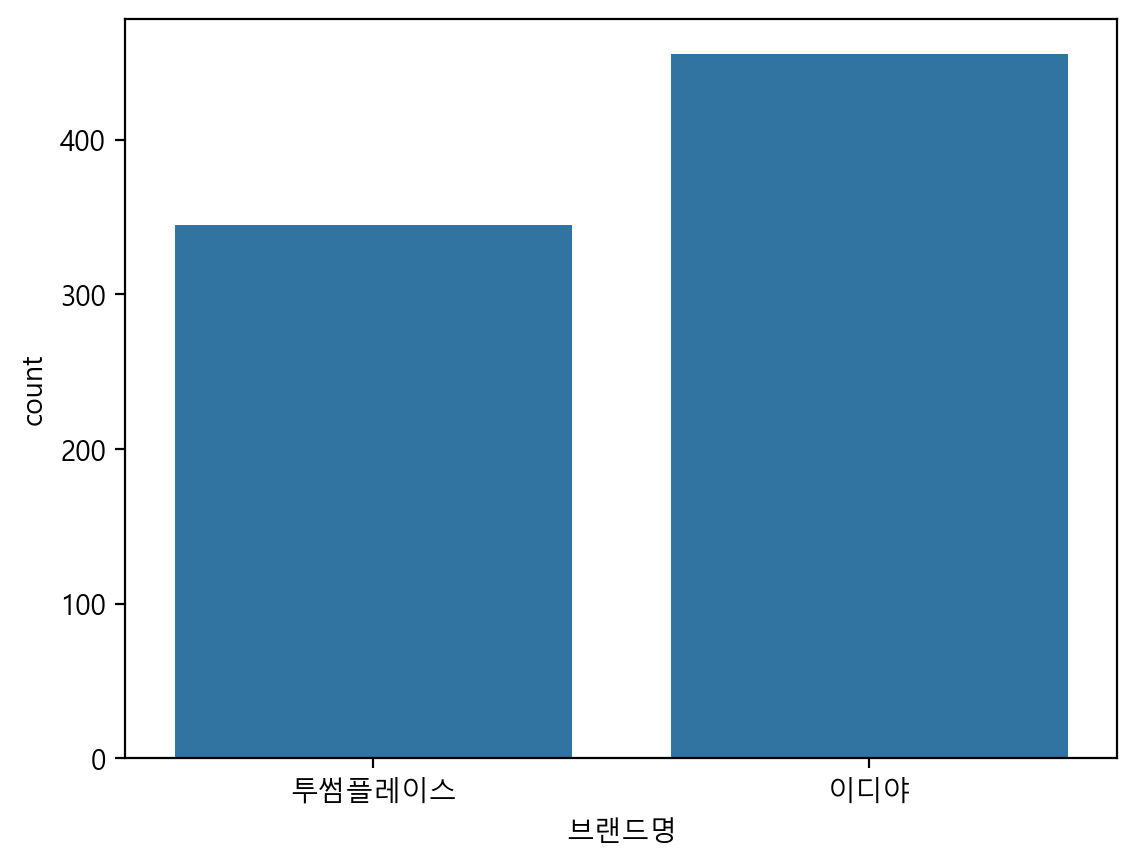

In [61]:
sns.countplot(data=df_cafe, x="브랜드명")